In [5]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pure matplotlib display (no cv2 display or color conversion)
def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,4))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)  # assume already RGB
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()


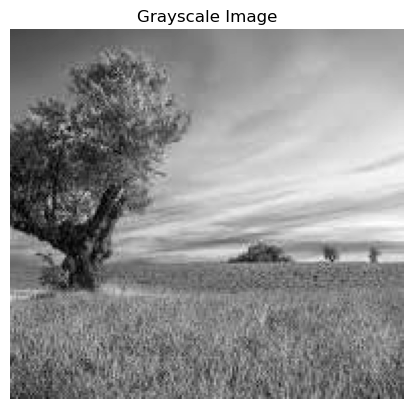

In [2]:
image_data = cv2.imread("asd.jpg", 0)

plt.imshow(image_data, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [3]:
image_data.shape

(183, 195)

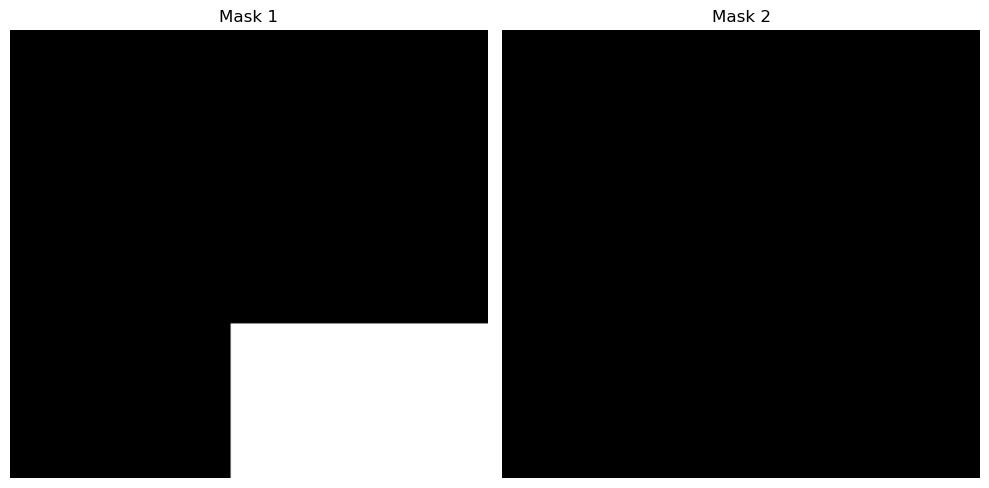

In [4]:
# initialize masks
mask1 = np.zeros(image_data.shape[:2], np.uint8)
mask2 = np.zeros(image_data.shape[:2], np.uint8)

# draw rectangles
cv2.rectangle(mask1, (90, 120), (380, 380), 255, -1)
cv2.rectangle(mask2, (350, 10), (635, 380), 255, -1)

# display using matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask1, cmap='gray')
plt.title("Mask 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask2, cmap='gray')
plt.title("Mask 2")
plt.axis("off")

plt.tight_layout()
plt.show()

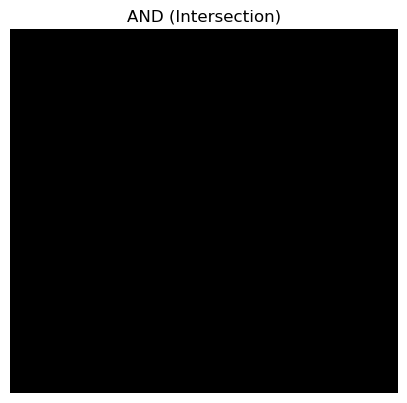

In [5]:

# Shows only where they intersect
And = cv2.bitwise_and(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(And, cmap='gray')
plt.title("AND (Intersection)")
plt.axis("off")
plt.show()

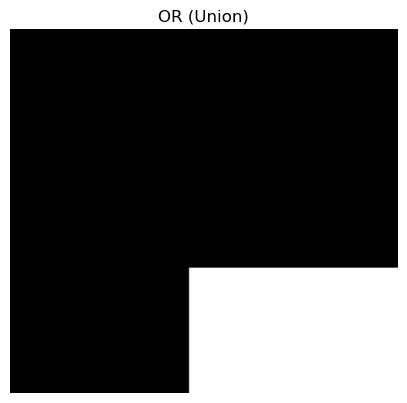

In [6]:
# Shows where either mask1 or mask2 is white
bitwiseOr = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR (Union)")
plt.axis("off")
plt.show()

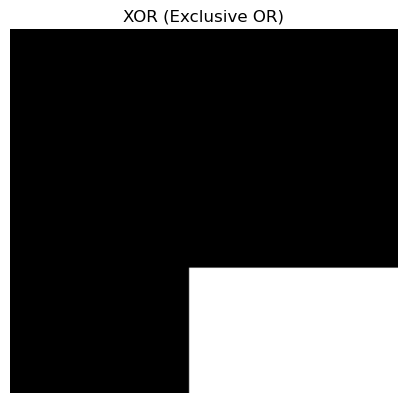

In [7]:


# Shows where either exists by itself (non-overlapping regions)
bitwiseXor = cv2.bitwise_xor(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR (Exclusive OR)")
plt.axis("off")
plt.show()

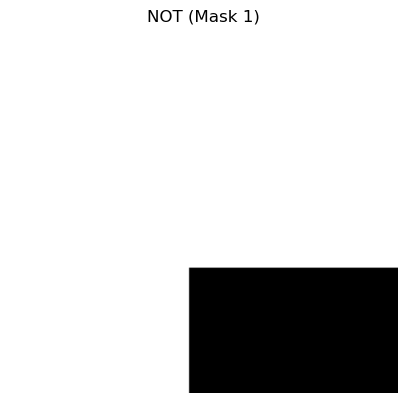

In [8]:

# Shows everything that isn't part of mask1
bitwiseNot_sq = cv2.bitwise_not(mask1)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_sq, cmap='gray')
plt.title("NOT (Mask 1)")
plt.axis("off")
plt.show()

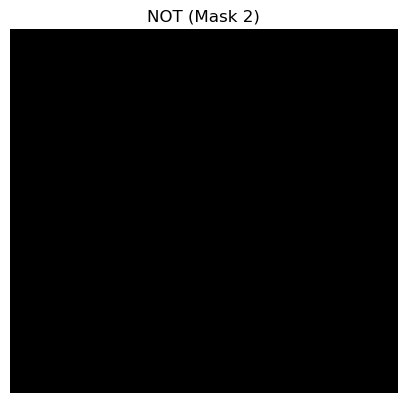

In [9]:


# Invert mask2
bitwiseNot_ell = cv2.bitwise_not(mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_ell, cmap='gray')
plt.title("NOT (Mask 2)")
plt.axis("off")
plt.show()

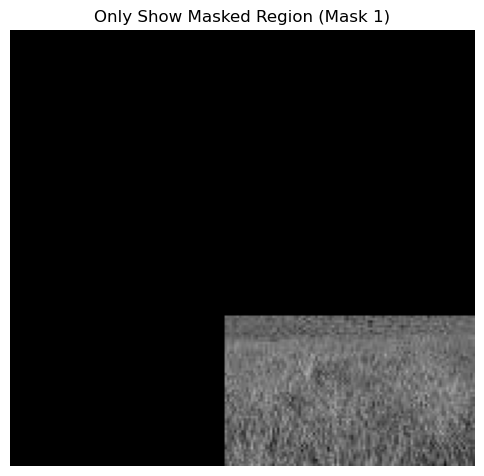

In [11]:

puppy = cv2.bitwise_and(image_data, image_data, mask=mask1)

# Convert BGR to RGB for correct color display
puppy_rgb = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(puppy_rgb)
plt.title("Only Show Masked Region (Mask 1)")
plt.axis("off")
plt.show()
     

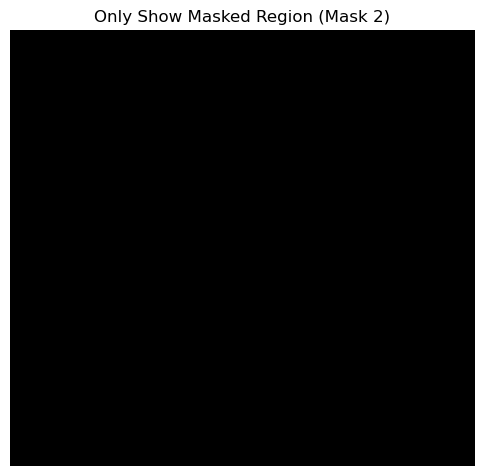

In [12]:


# Apply mask2 to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=mask2)

# Convert BGR to RGB for correct color display
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Only Show Masked Region (Mask 2)")
plt.axis("off")
plt.show()

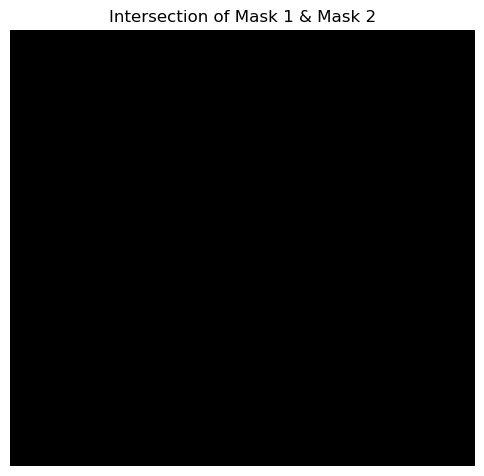

In [13]:


# Apply intersection mask (And) to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=And)

# Convert BGR to RGB
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Intersection of Mask 1 & Mask 2")
plt.axis("off")
plt.show()

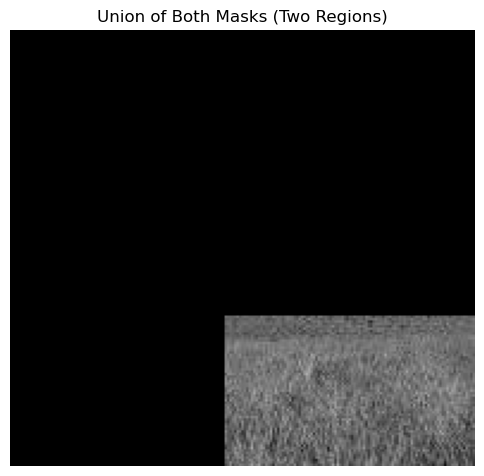

In [14]:

# Apply OR mask to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=bitwiseOr)

# Convert BGR → RGB for proper display
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Union of Both Masks (Two Regions)")
plt.axis("off")
plt.show()

In [15]:
img = np.tile(np.linspace(0,255,400, dtype=np.uint8), (300,1))

h, w = img.shape
mask = np.zeros((h,w), dtype=np.uint8)

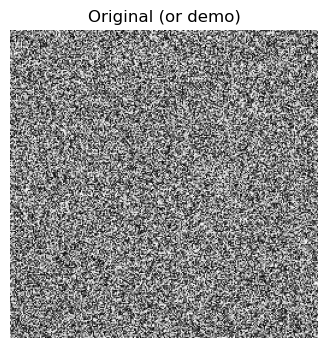

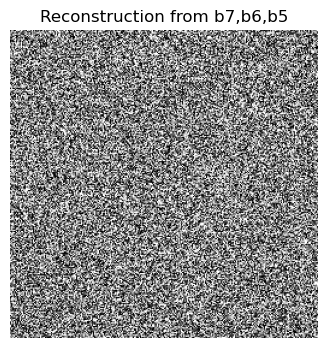

In [16]:
# TODO: load an image (grayscale)
# img = cv2.imread("images/sample.jpg", cv2.IMREAD_GRAYSCALE)

# Demo fallback (remove if using your own image):
img = (np.random.rand(256,256)*255).astype(np.uint8)

# Extract planes (planes[i] is bit i)
planes = [(img >> i) & 1 for i in range(8)]

# Reconstruct using planes 7,6,5
recon = np.zeros_like(img, dtype=np.uint8)
for i in [7,6,5]:
    recon = recon + (planes[i].astype(np.uint8) << i)

show(img, "Original (or demo)", cmap="gray")
show(recon, "Reconstruction from b7,b6,b5", cmap="gray")

In [19]:
pip install nump

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4

In [21]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [22]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


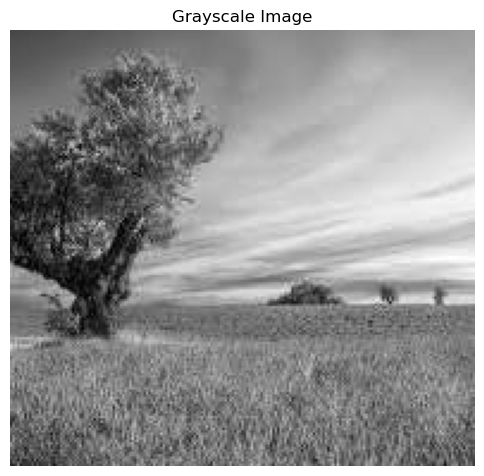

In [6]:


# Read image in grayscale
img = cv2.imread('asd.jpg', 0)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

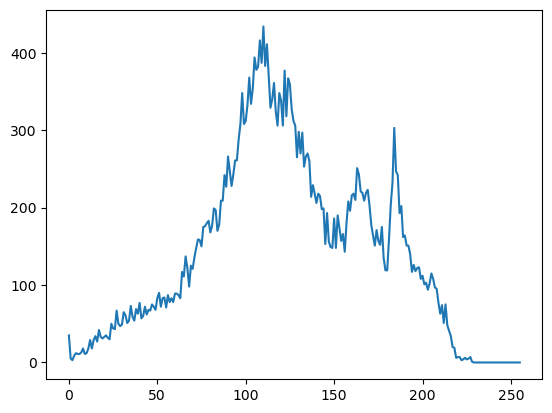

In [7]:

# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)
     

In [8]:

# Let's read two other images
high = cv2.imread('asd.jpg')
low = cv2.imread('asd.jpg')

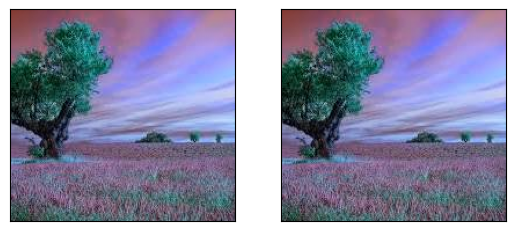

In [9]:

# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

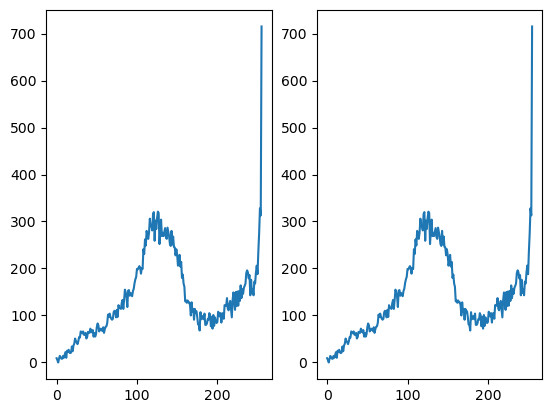

In [10]:

# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

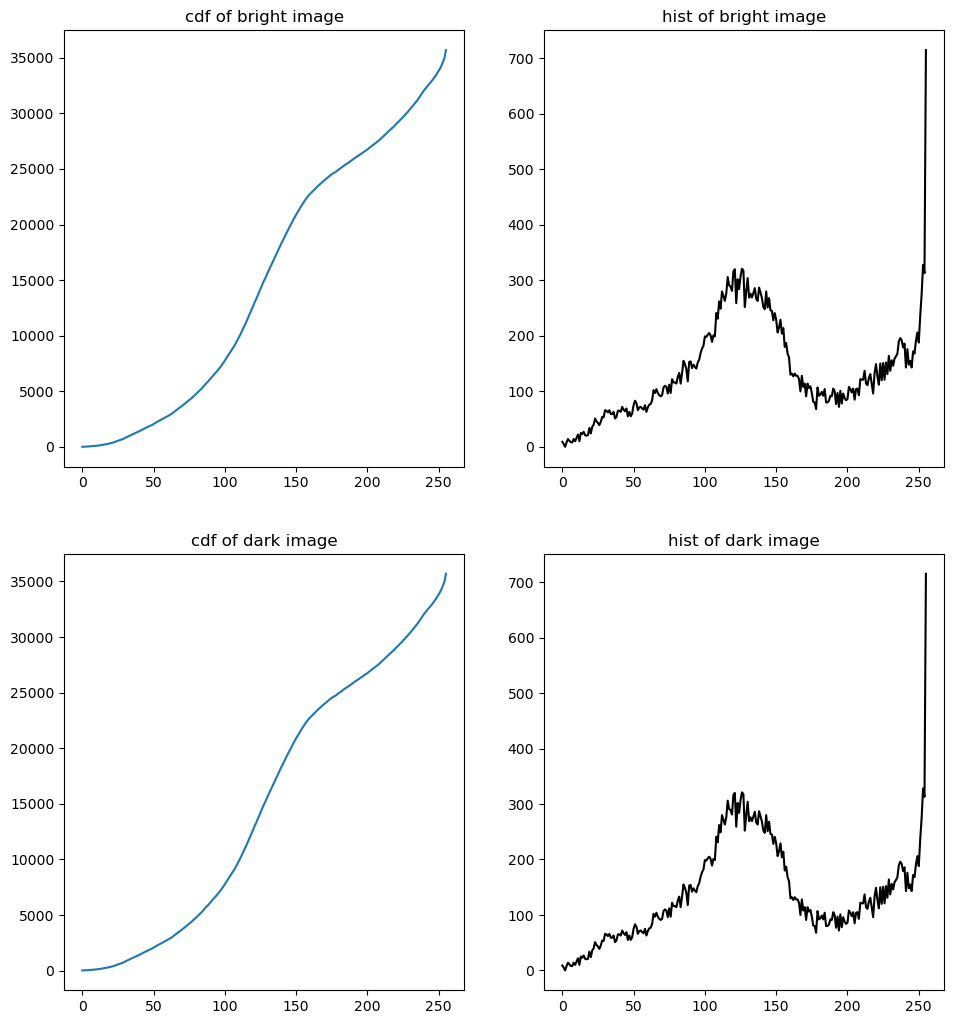

In [11]:


cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('hist of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('hist of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=1, right=1.5, top=3)

plt.show()

In [12]:

low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

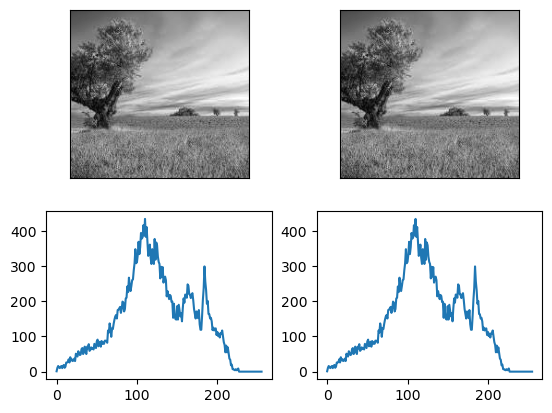

In [13]:


# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()
     

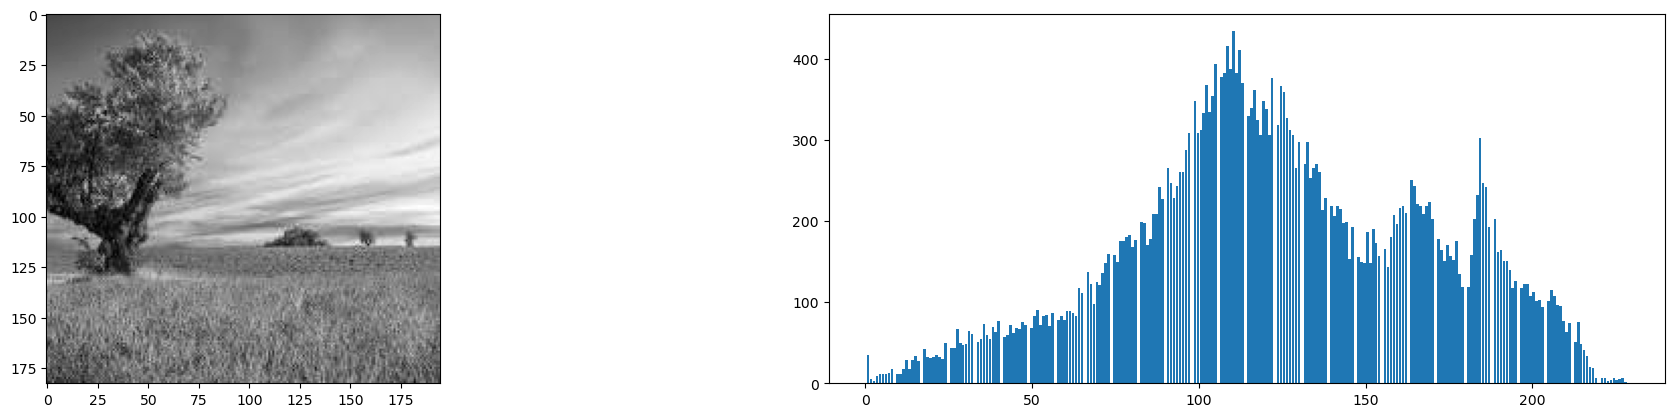

In [14]:

img = cv2.imread("asd.jpg", 0)
img_hist = np.histogram(img, bins=256)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.bar(img_hist[1][1:], img_hist[0])
plt.subplots_adjust(right=3)
plt.show()
     

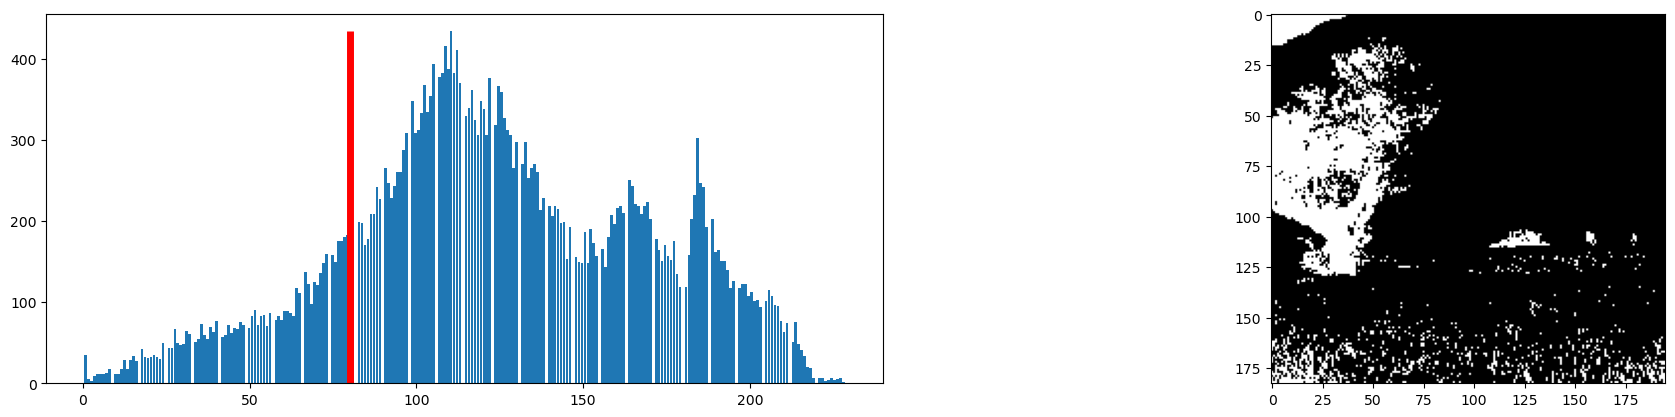

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [15]:


t = 80
thresholded = img < t

plt.subplot(121)
plt.bar(img_hist[1][1:], img_hist[0])
plt.vlines(t, 0, np.amax(img_hist[0]), colors='r', linewidth=5)
plt.subplot(122)
plt.imshow(thresholded, cmap="gray")
plt.subplots_adjust(right=3)
plt.show()

print(thresholded[150])

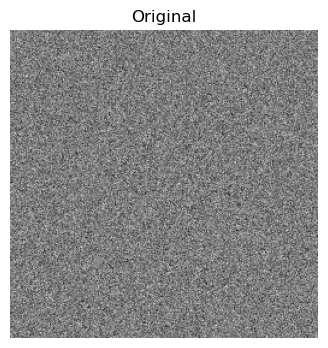

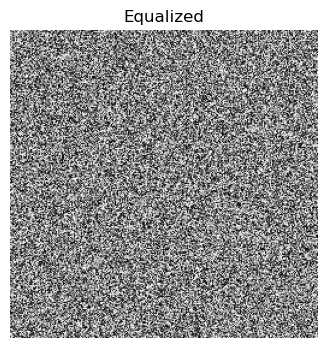

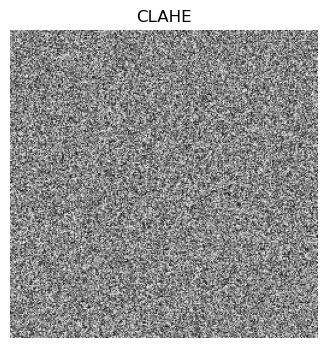

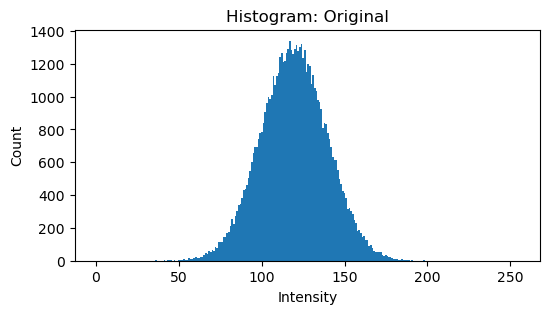

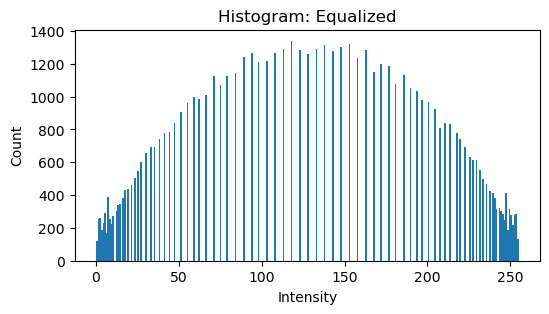

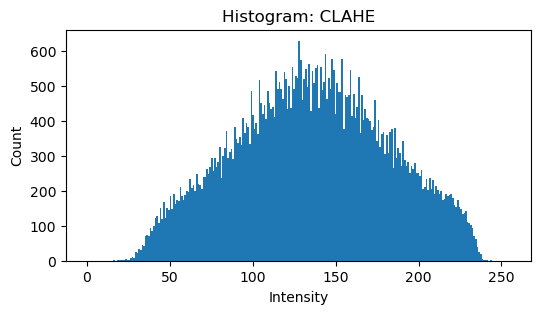

In [16]:


# TODO: load your image
# img = cv2.imread("images/low_contrast.jpg", cv2.IMREAD_GRAYSCALE)

# Demo fallback
img = np.uint8(np.clip(120 + 20*np.random.randn(256,256), 0, 255))

eq = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

def plot_hist(a, title):
    plt.figure(figsize=(6,3))
    plt.hist(a.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()

show(img, "Original", cmap="gray")
show(eq, "Equalized", cmap="gray")
show(clahe, "CLAHE", cmap="gray")

plot_hist(img, "Histogram: Original")
plot_hist(eq, "Histogram: Equalized")
plot_hist(clahe, "Histogram: CLAHE")


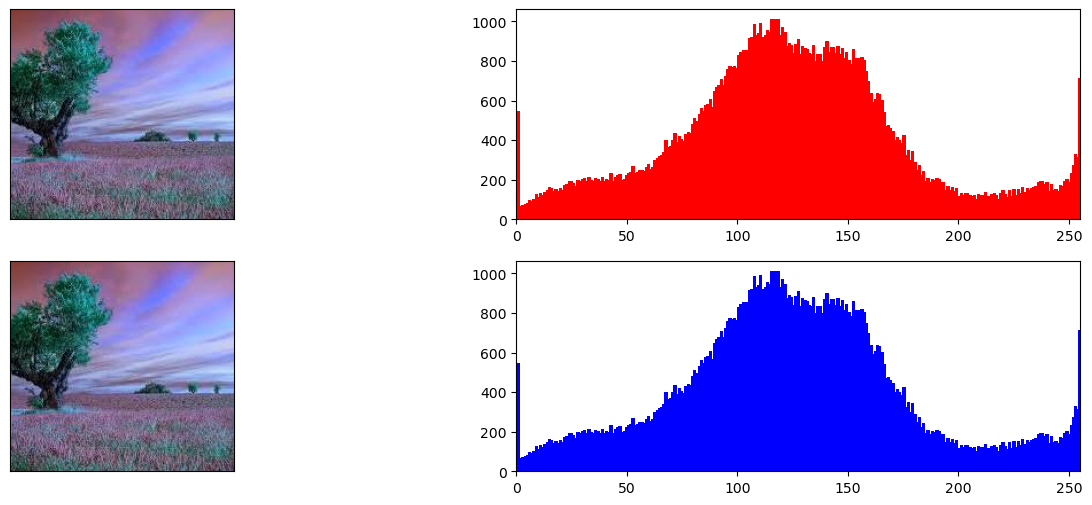

[[[130.  58.  50.]
  [130.  58.  50.]
  [130.  58.  51.]
  ...
  [177. 126. 153.]
  [177. 126. 154.]
  [177. 126. 154.]]

 [[130.  58.  50.]
  [130.  58.  50.]
  [131.  59.  52.]
  ...
  [178. 127. 154.]
  [178. 127. 155.]
  [178. 127. 155.]]

 [[131.  59.  52.]
  [131.  59.  52.]
  [132.  60.  53.]
  ...
  [178. 127. 155.]
  [176. 126. 156.]
  [176. 126. 156.]]

 ...

 [[ 30.  53.  49.]
  [ 65.  86.  83.]
  [ 54.  71.  68.]
  ...
  [ 70.  60.  77.]
  [ 69.  63.  80.]
  [ 59.  53.  70.]]

 [[ 32.  51.  48.]
  [ 75.  92.  89.]
  [ 55.  68.  66.]
  ...
  [ 83.  73.  90.]
  [ 87.  81.  98.]
  [ 52.  46.  63.]]

 [[ 23.  37.  35.]
  [ 26.  39.  37.]
  [ 45.  56.  54.]
  ...
  [ 88.  80.  97.]
  [101.  95. 112.]
  [ 52.  46.  63.]]]


In [17]:

# Compute histogram of the image
image = cv2.imread("asd.jpg")
hist_img = np.histogram(image, bins=256)

# Create the stretched image by normalizing it between 0 and L-1.
stretched_img = (255 - 0) / (np.amax(image) - np.amin(image)) * (image - np.amin(image))
hist_strch = np.histogram(stretched_img, bins=256)

# Original image ---------------------------------------------------
plt.figure(figsize=(16, 6))
plt.subplot(221), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.xlim([0, 255])
plt.bar(hist_img[1][1:], hist_img[0], color='red', width=1.5)

# Stretched image ---------------------------------------------------
plt.subplot(223), plt.xticks([]), plt.yticks([])
plt.imshow(stretched_img.astype('uint8'), cmap='gray', vmin=0, vmax=255)

plt.subplot(224), plt.xlim([0, 255])
plt.bar(hist_strch[1][1:], hist_strch[0], color='blue', width=1.5)

plt.show()

print(stretched_img)

In [18]:
mri_img = cv2.imread('asd.jpg', 0)
cameraman_img = cv2.imread('asd2.jpg', 0)
pout_img = cv2.imread('asdfg.jpg', 0)

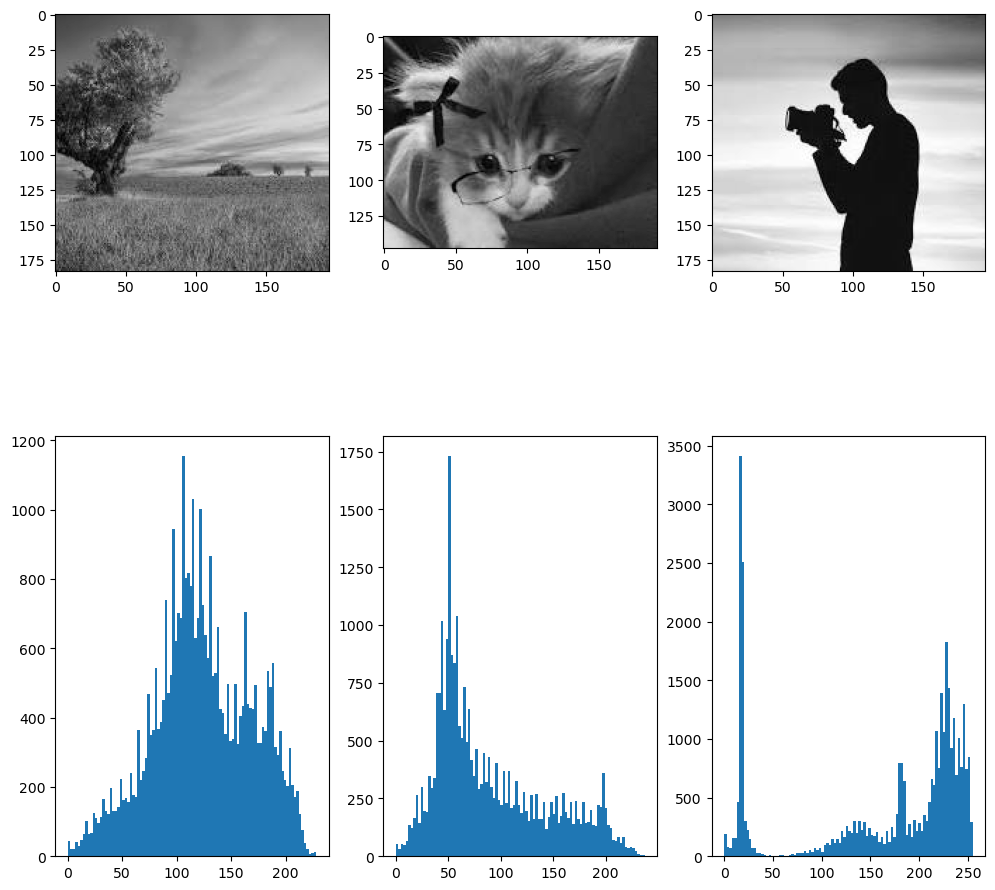

In [19]:
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(mri_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(234), plt.hist(mri_img.ravel(), bins=100)

plt.subplot(232), plt.imshow(cameraman_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(235), plt.hist(cameraman_img.ravel(), bins=100)

plt.subplot(233), plt.imshow(pout_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(236), plt.hist(pout_img.ravel(), bins=100)

plt.show()

In [20]:
def histogramEqualization(f, bins=100):
    his, be = np.histogram(f, bins=bins)
    his = his.astype(float)/sum(his)
    return np.interp(f, be, np.hstack((np.zeros((1)), np.cumsum(his))))

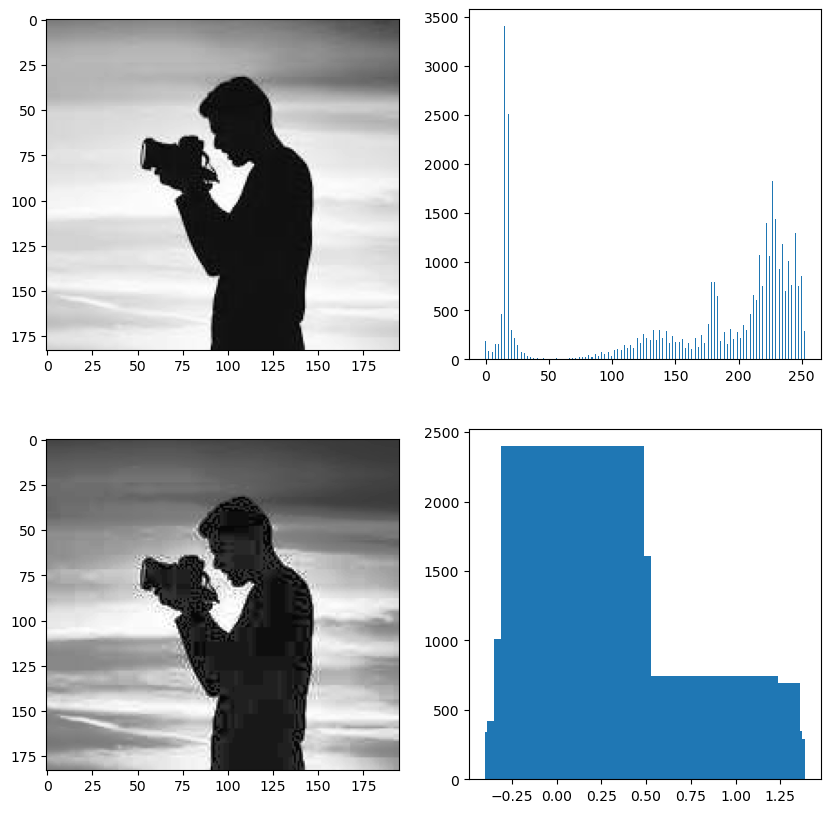

In [21]:
image = pout_img

plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(image, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)

Eq = histogramEqualization(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

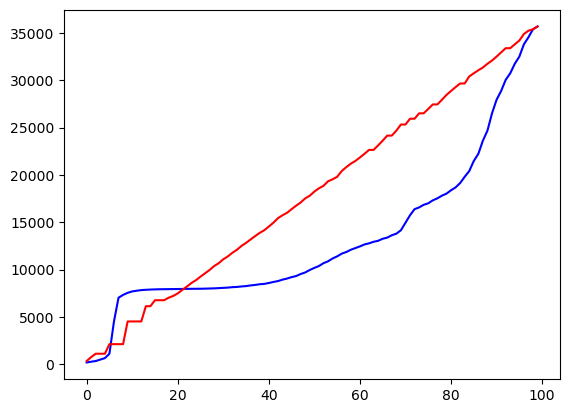

In [22]:
image = pout_img
histo, range = np.histogram(image, bins=100)
cdf_1 = np.cumsum(histo)

Eq = histogramEqualization(image)
histo, range = np.histogram(Eq, bins=100)
cdf_2 = np.cumsum(histo)

plt.figure()
plt.plot(cdf_1, 'b')
plt.plot(cdf_2, 'r')
plt.show()

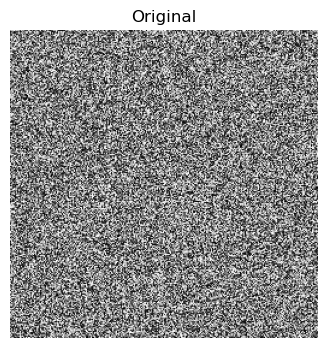

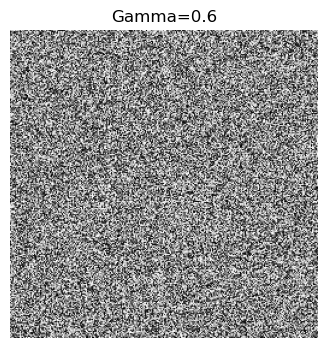

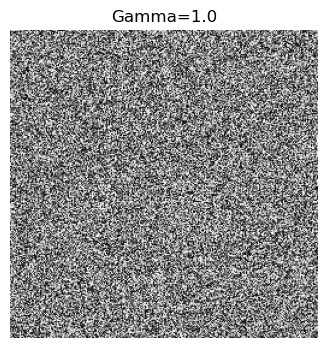

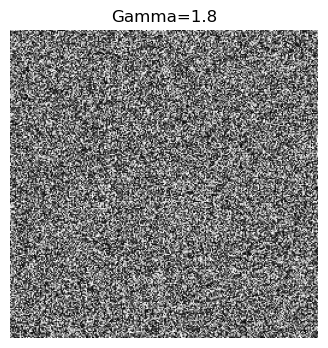

In [23]:
def apply_gamma(img, gamma):
    img = img.astype(np.float32) / 255.0
    out = np.power(img, gamma)
    return np.uint8(np.clip(out*255.0, 0, 255))

# TODO: load grayscale image
# img = cv2.imread("images/sample.jpg", cv2.IMREAD_GRAYSCALE)

# Demo fallback
img = np.uint8(np.clip(60 + 80*np.random.rand(256,256), 0, 255))

g1 = apply_gamma(img, 0.6)
g2 = apply_gamma(img, 1.0)
g3 = apply_gamma(img, 1.8)

show(img, "Original", cmap="gray")
show(g1, "Gamma=0.6", cmap="gray")
show(g2, "Gamma=1.0", cmap="gray")
show(g3, "Gamma=1.8", cmap="gray")